In [1]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
parent_directory = "/home/schmiedc/FMP_Docs/Projects/Bioactives_data/"

input_path = parent_directory + "results/"
output_path = input_path
annot_path = parent_directory  + "annotations/"
figure_path = parent_directory + "figures/"

# Annotations from probes and drugs: 

https://www.probes-drugs.org/compounds/standardized#

In [3]:
annotations_pd = pd.read_csv(annot_path  + "pd_export_04_2022_2464_targets_standardized.csv")

In [4]:
len(annotations_pd['pdid'].unique())

2362

# Plot basic stuff about bioactive library
Using the p&d annotations

In [5]:
bioactive_library_compounds = 2464
compounds_with_targets = len(annotations_pd['pdid'].unique())

In [6]:
percent_labeled = round(compounds_with_targets / bioactive_library_compounds * 100, 1)

In [7]:
percent_unlabeled = 100 - percent_labeled

In [8]:
labels = 'Target', 'No Target'
percentages = [percent_labeled, percent_unlabeled]

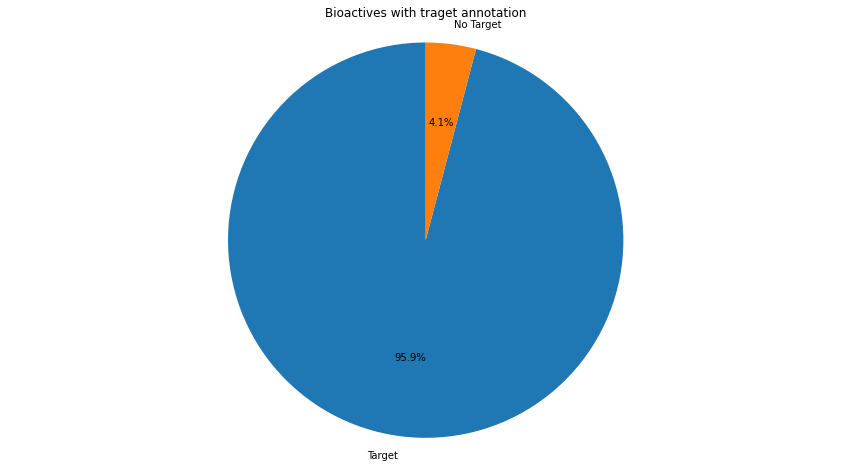

In [9]:
plt.figure(figsize=(15,8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Bioactives with traget annotation') ; plt.axis('equal')
plt.savefig(figure_path + str(date.today()) + '_Bioactives_CompoundWithAnnotations.pdf',  dpi=300)

In [10]:
number_of_targets_percompound = pd.DataFrame(annotations_pd['pdid'].value_counts())
number_of_targets_percompound.head()

,pdid
PD003501,272
PD021374,213
PD010820,213
PD011193,208
PD004099,205


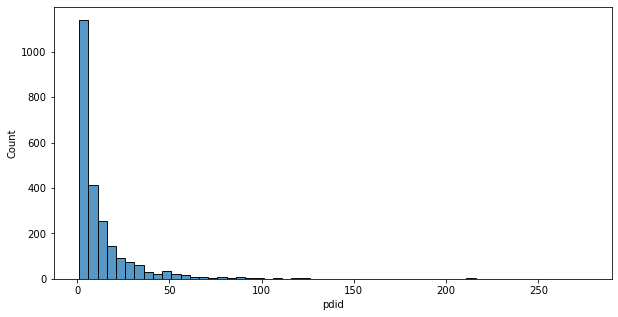

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(data=number_of_targets_percompound, x="pdid", binwidth=5)
plt.savefig(figure_path + str(date.today()) + '_Bioactives_Targets-Compound.pdf',  dpi=300)

In [12]:
number_of_targets_percompound.head()

,pdid
PD003501,272
PD021374,213
PD010820,213
PD011193,208
PD004099,205


In [13]:
number_of_targets_percompound.max()

pdid    272
dtype: int64

In [14]:
number_of_targets_percompound.median()

pdid    6.0
dtype: float64

In [15]:
number_of_targets_percompound

,pdid
PD003501,272
PD021374,213
PD010820,213
PD011193,208
PD004099,205
...,...
PD048101,1
PD012272,1
PD080227,1
PD080219,1


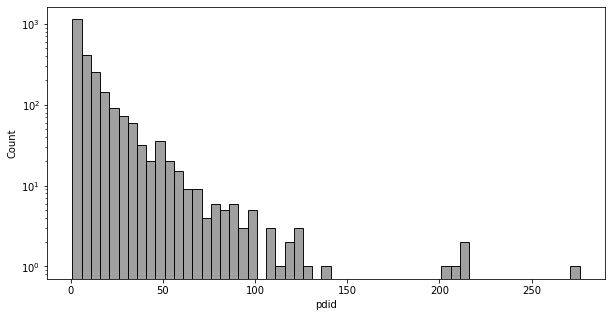

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(data=number_of_targets_percompound, x="pdid", binwidth=5,  color='gray')
plt.yscale('log')
plt.savefig(figure_path + str(date.today()) + '_Bioactives_Targets-Compound_Log.pdf',  dpi=300)


In [18]:
print("Compounds with annotations have median of ", round(number_of_targets_percompound['pdid'].median()), "targets")

Compounds with annotations have median of  6 targets


In [19]:
print("There are", len(annotations_pd['target_name'].unique()),"unique targets")

There are 2841 unique targets


In [20]:
multiple_targets = pd.DataFrame(annotations_pd['target_name'].value_counts())
print("Targets with one compound", len(multiple_targets[multiple_targets['target_name'] == 1]) )

Targets with one compound 941


<AxesSubplot: xlabel='target_name', ylabel='Count'>

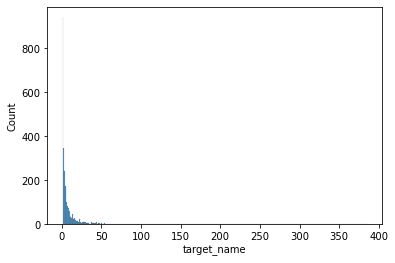

In [21]:
sns.histplot(data=multiple_targets, x="target_name")

In [22]:
list(annotations_pd.columns)

['pdid',
 'name',
 'target_name',
 'gene_name',
 'target_type',
 'moa',
 'human',
 'activity_biochemical',
 'activity_cell',
 'probe',
 'GTOPDB [LEVEL 1]',
 'GTOPDB [LEVEL 2]',
 'GTOPDB [LEVEL 3]',
 'GTOPDB [LEVEL 4]',
 'GTOPDB [LEVEL 5]',
 'GTOPDB [LEVEL 6]',
 'ChEMBL [LEVEL 1]',
 'ChEMBL [LEVEL 2]',
 'ChEMBL [LEVEL 3]',
 'ChEMBL [LEVEL 4]',
 'ChEMBL [LEVEL 5]',
 'ChEMBL [LEVEL 6]',
 'Reactome [LEVEL 1]',
 'Reactome [LEVEL 2]',
 'Reactome [LEVEL 3]',
 'Reactome [LEVEL 4]',
 'Reactome [LEVEL 5]',
 'Reactome [LEVEL 6]',
 'Reactome [LEVEL 7]',
 'Reactome [LEVEL 8]',
 'Reactome [LEVEL 9]']

In [23]:
unique_targets = annotations_pd.drop_duplicates(subset=['target_name'])

In [24]:
len(unique_targets)

2841

In [25]:
GTOPDB_numbers = pd.DataFrame(unique_targets['GTOPDB [LEVEL 1]'].value_counts())

In [26]:
Reactome_numbers = pd.DataFrame(unique_targets['Reactome [LEVEL 1]'].value_counts())

In [27]:
GTOPDB_numbers.to_csv(output_path + str(date.today()) + '_Bioactives_GTOPDB_numbers.csv', index=False)

<AxesSubplot: ylabel='GTOPDB [LEVEL 1]'>

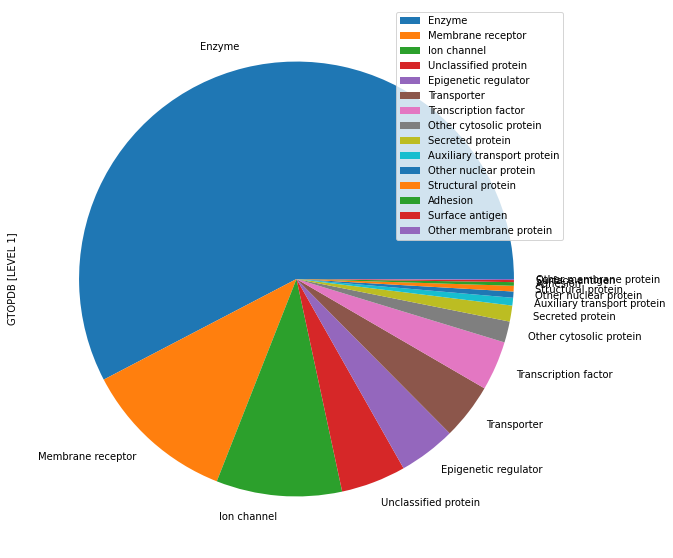

In [28]:
GTOPDB_numbers.plot.pie(y='GTOPDB [LEVEL 1]', figsize=(10, 10))

In [29]:
GTOPDB_numbers = GTOPDB_numbers.reset_index()

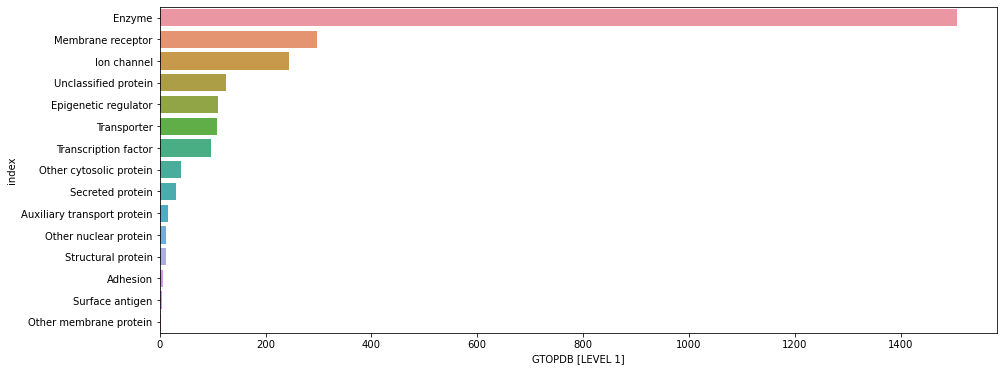

In [30]:
plt.figure(figsize=(15,6))
plot = sns.barplot(data=GTOPDB_numbers, x='GTOPDB [LEVEL 1]', y='index')
plt.savefig(figure_path + str(date.today()) + '_Bioactives_Targets_GTOPBD.pdf',  dpi=300)

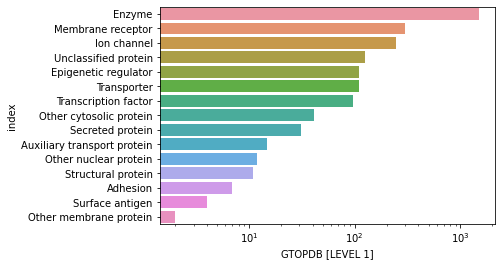

In [31]:
plot = sns.barplot(data=GTOPDB_numbers, x='GTOPDB [LEVEL 1]', y='index')
plot.set_xscale("log")

<AxesSubplot: ylabel='Reactome [LEVEL 1]'>

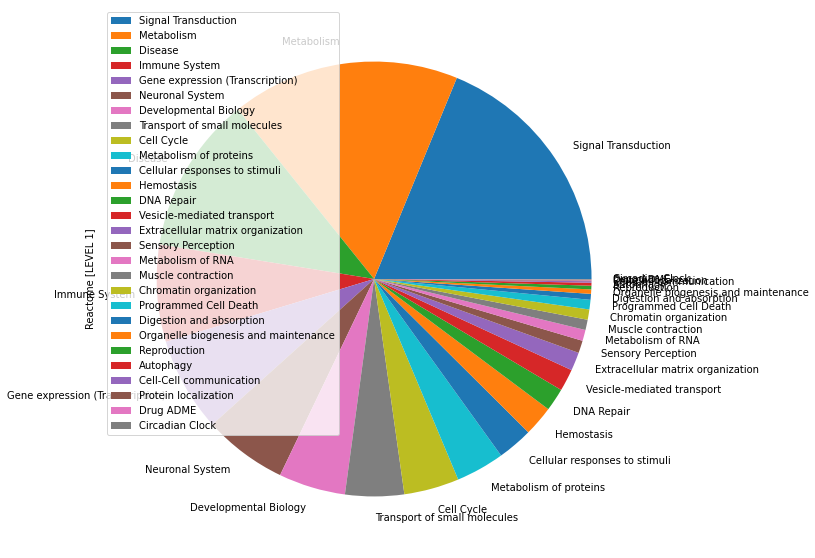

In [32]:
Reactome_numbers.plot.pie(y='Reactome [LEVEL 1]', figsize=(10, 10))

In [33]:
Reactome_numbers = Reactome_numbers.reset_index()

In [34]:
Reactome_numbers.to_csv(output_path + str(date.today()) +'_Bioactives_Reactome_numbers.csv', index=False)

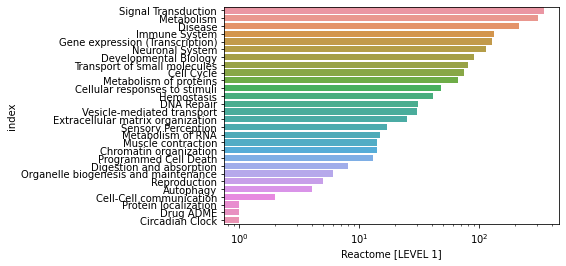

In [35]:
plot = sns.barplot(data=Reactome_numbers , x='Reactome [LEVEL 1]', y='index')
plot.set_xscale("log")

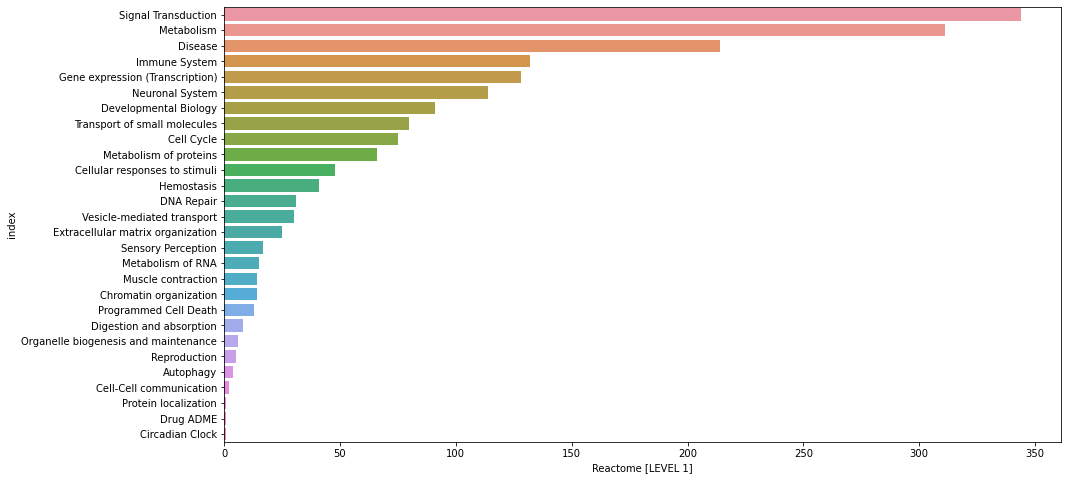

In [36]:
plt.figure(figsize=(15,8))
plot = sns.barplot(data=Reactome_numbers , x='Reactome [LEVEL 1]', y='index')
plt.savefig(figure_path + str(date.today()) + '_Bioactives_Targets_Reactome.pdf',  dpi=300)